# Jupyter Notebook Version for calculating Equatorial Impact of the Niño

In [1]:
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation
import numpy as np

## Configuration

In [2]:
# We will use sea surface temperature both for dataset and predictor, but
# with differnt regions
predictor = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10,
           lon0=-60, lonf=15,
           month0=Month.JUN, monthf=Month.AUG,
           year0=1970, yearf=2019),
    skip=1
)
predictand = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,  
           # year0, yearf refer to monthf -> will span from DEC 1970 to FEB 2020 
           year0=1971, yearf=2020),
    skip=1
)
#  There is a lag of 6 months (from June to December)

## Methodology

### Preprocessing

In [3]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=8, order=4)
predictor_preprocessed.save("y_", "./data-EquatorialAtalantic_Impact_Nino/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", 
#     "./data-EquatorialAtalantic_Impact_Nino/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-EquatorialAtalantic_Impact_Nino/")
# predictand_preprocessed = Preprocess.load("z_", 
#     "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.104 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/y_*.npy`
[INFO] Preprocessing data for variable sst took: 0.225 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/z_*.npy`


### MCA

In [4]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# mca = MCA.load("mca_", "./data-EquatorialAtalantic_Impact_Nino/", 
#     dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(2100, 50) 
            Y(760, 50) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 0.690 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/mca_*.npy`


### Crossvalidation

In [5]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-EquatorialAtalantic_Impact_Nino/")
# cross = Crossvalidation.load("cross_", "./data-EquatorialAtalantic_Impact_Nino/", 
#     dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying Crossvalidation 
    Shapes: Z(2100, 50) 
            Y(760, 50) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
	year: 1 of 50
	year: 2 of 50
	year: 3 of 50
	year: 4 of 50
	year: 5 of 50
	year: 6 of 50
	year: 7 of 50
	year: 8 of 50
	year: 9 of 50
	year: 10 of 50
	year: 11 of 50
	year: 12 of 50
	year: 13 of 50
	year: 14 of 50
	year: 15 of 50
	year: 16 of 50
	year: 17 of 50
	year: 18 of 50
	year: 19 of 50
	year: 20 of 50
	year: 21 of 50
	year: 22 of 50
	year: 23 of 50
	year: 24 of 50
	year: 25 of 50
	year: 26 of 50
	year: 27 of 50
	year: 28 of 50
	year: 29 of 50
	year: 30 of 50
	year: 31 of 50
	year: 32 of 50
	year: 33 of 50
	year: 34 of 50
	year: 35 of 50
	year: 36 of 50
	year: 37 of 50
	year: 38 of 50
	year: 39 of 50
	year: 40 of 50
	year: 41 of 50
	year: 42 of 50
	year: 43 of 50
	year: 44 of 50
	year: 45 of 50
	year: 46 of 50
	year: 47 of 50
	year: 48 of 50
	year: 49 of 50
	year: 50 of 50

	Took: 44.1

## Plotting results

[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/cross.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/zhat_1998.png


(<Figure size 1200x1000 with 5 Axes>,
 (<GeoAxesSubplot:title={'center':'Y on year 1997'}>,
  <GeoAxesSubplot:title={'center':'Zhat on year 1998'}>,
  <GeoAxesSubplot:title={'center':'Z on year 1998'}>))

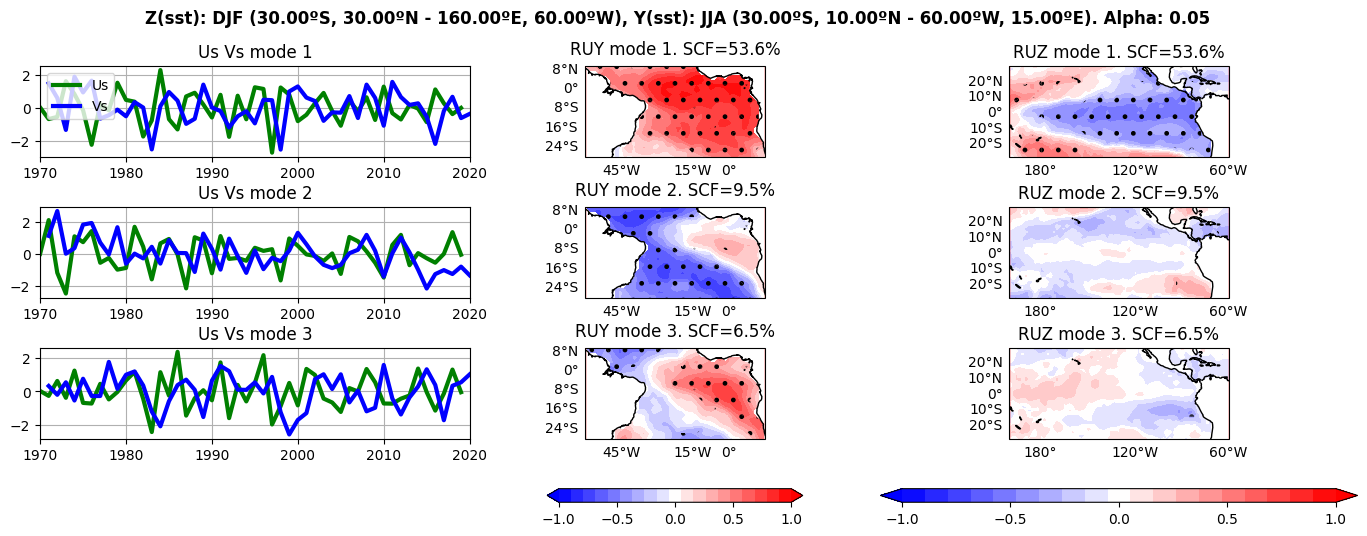

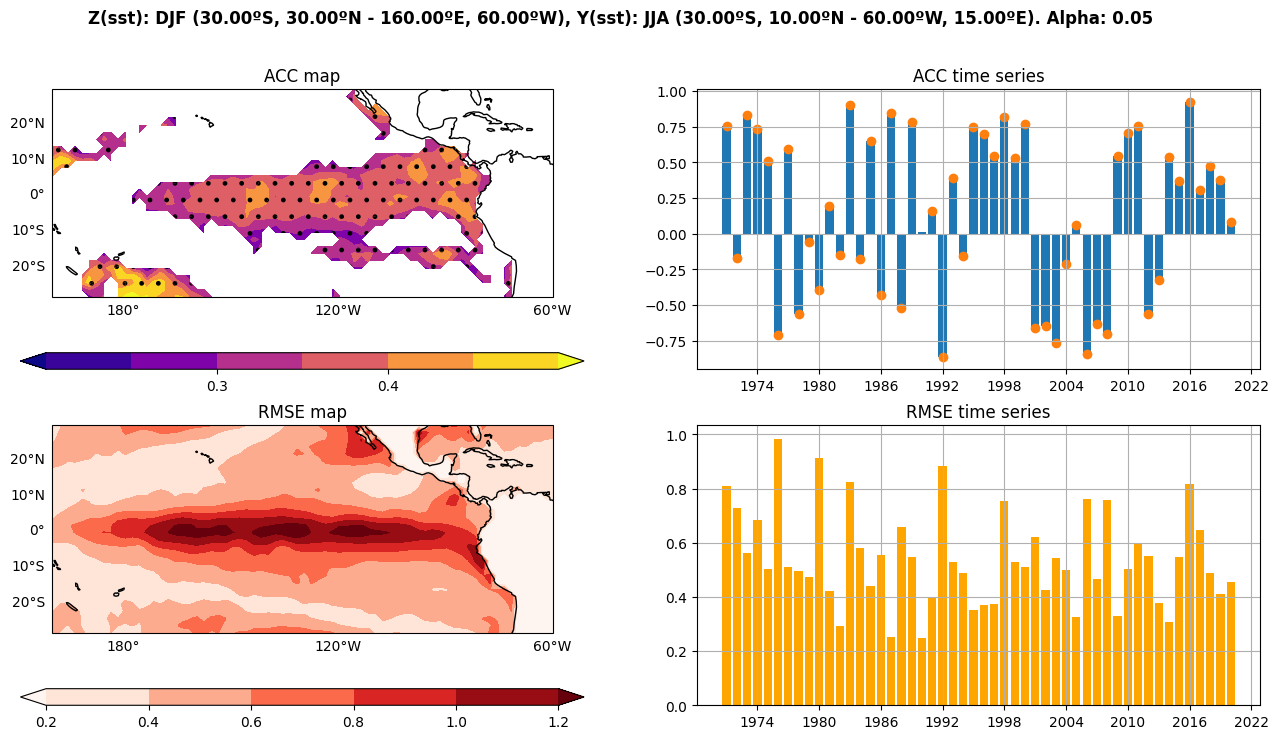

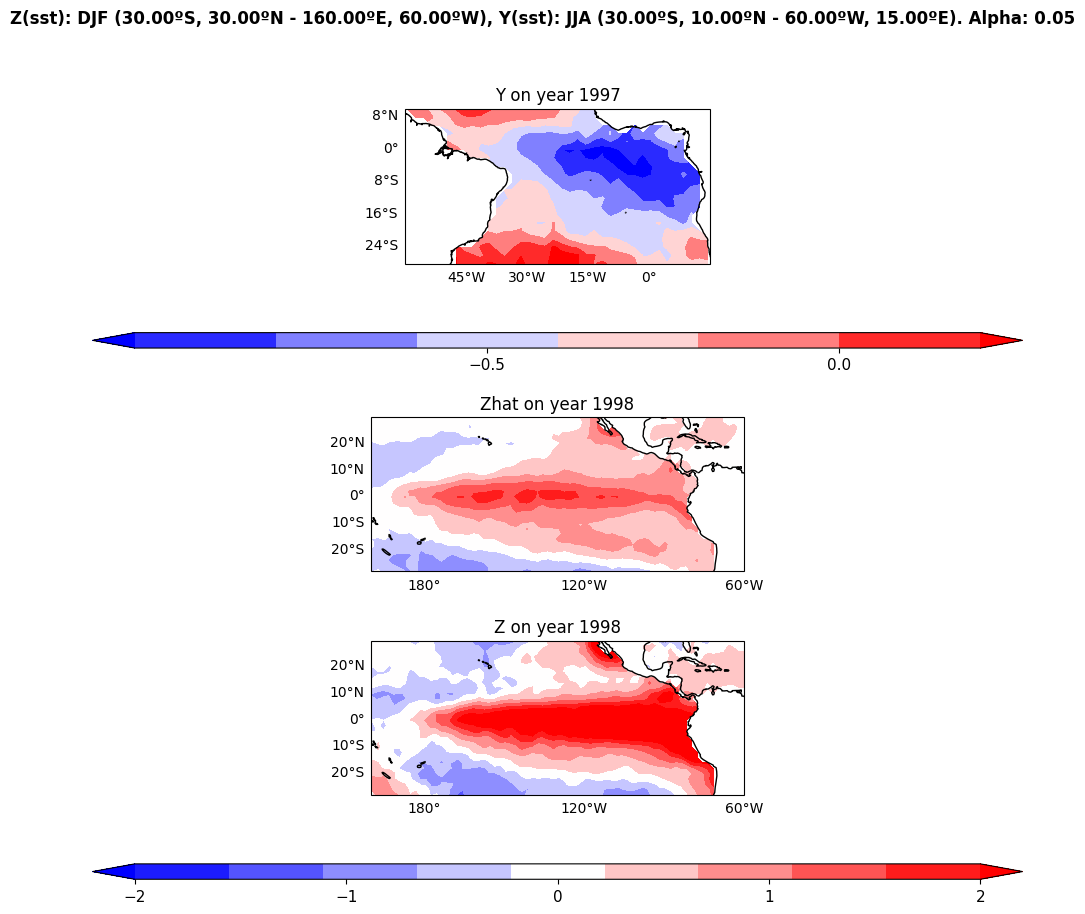

In [18]:
mca.plot(save_fig=True, name="mca.png", 
         folder="./plots-EquatorialAtalantic_Impact_Nino/", 
         ruy_ticks=[-1, -0.5, 0, 0.5, 1], ruz_ticks=[-1, -0.5, 0, 0.5, 1])
cross.plot(save_fig=True, name="cross.png", 
           cmap="plasma", map_levels=[0.20, 0.25, 0.3, 0.35, 0.40, 0.45, 0.50,],
           folder="./plots-EquatorialAtalantic_Impact_Nino/")
cross.plot_zhat(1998, figsize=(12, 10), save_fig=True, name="zhat_1998.png", 
                folder="./plots-EquatorialAtalantic_Impact_Nino/", 
                z_levels=np.linspace(-2, 2, 10), z_ticks=np.linspace(-2, 2, 5))

## Use global regression maps

You need to slice a new dataset and pass it to the plotting function so that it applies the regression on that map

[INFO] Preprocessing data for variable sst took: 0.125 seconds
[INFO] Preprocessing data for variable sst took: 0.519 seconds
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca_global.png


((<Figure size 1300x800 with 11 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <AxesSubplot:title={'center':'Us Vs mode 2'}>,
  <AxesSubplot:title={'center':'Us Vs mode 3'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 1. SCF=53.6%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 2. SCF=9.5%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 3. SCF=6.5%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 1. SCF=53.6%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 2. SCF=9.5%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 3. SCF=6.5%'}>))

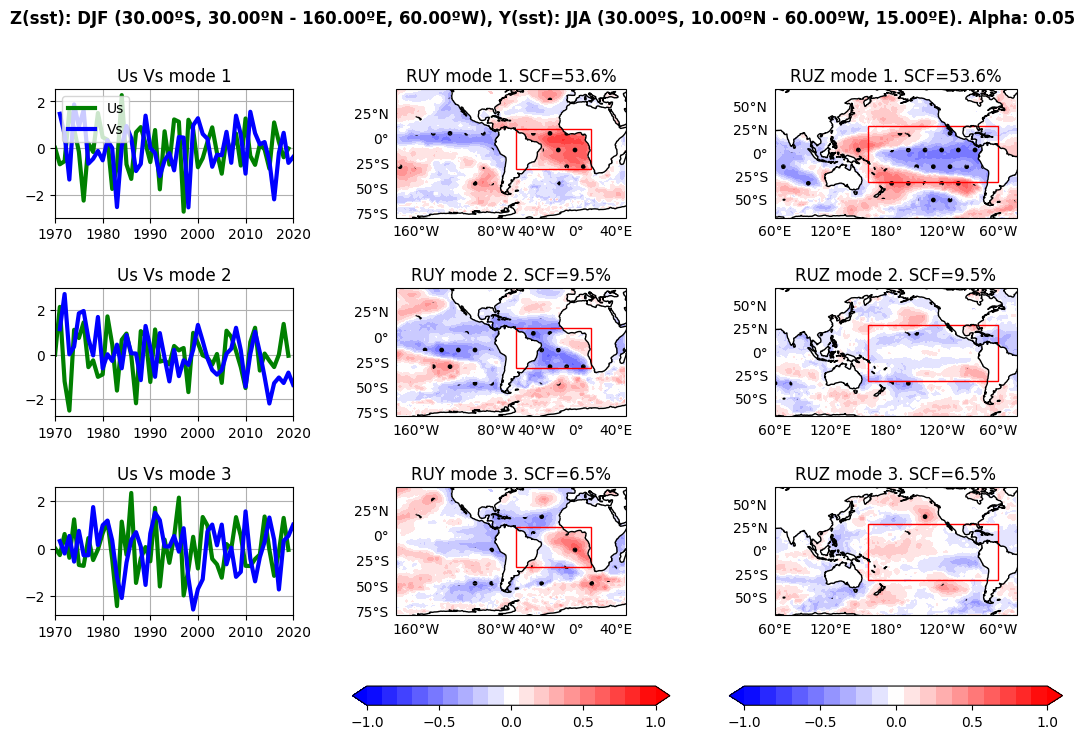

In [7]:
map_y = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-80, latf=50, lon0=-180, lonf=50, month0=Month.JUN, monthf=Month.AUG,
           year0=1970, yearf=2019), skip=1))
map_z = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-70, latf=70, lon0=-300, lonf=-40, month0=Month.DEC, monthf=Month.FEB,
           year0=1971, yearf=2020), skip=1))
mca.plot(save_fig=True, name="mca_global.png", map_y=map_y, map_z=map_z, figsize=(13, 8), 
         width_ratios=[1.5, 2, 2.1], folder="./plots-EquatorialAtalantic_Impact_Nino/", 
         ruy_ticks=[-1, -0.5, 0, 0.5, 1], ruz_ticks=[-1, -0.5, 0, 0.5, 1])

## Validation

It is important to say that this is **not** a good example of validation becuase it uses two periods where the relation is **non stationary**, so the results are not good. However, it shows how to apply *Validation* to any dataset with any configuration.

In [8]:
from spy4cast.spy4cast import Validation

In [9]:
# To apply validation we first preprocess the training data
training_y = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10, lon0=-60, lonf=15, month0=Month.JUN, monthf=Month.AUG,
           year0=1970, yearf=2000), skip=1))
training_z = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30, lon0=-200, lonf=-60, month0=Month.DEC, monthf=Month.FEB,
           year0=1971, yearf=2001), skip=1))

training_y.save("training_y_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_y = Preprocess.load("training_y_", "./data/-EquatorialAtalantic_Impact_Nino")
training_z.save("training_z_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_z = Preprocess.load("training_z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.025 seconds
[INFO] Preprocessing data for variable sst took: 0.128 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/training_y_*.npy`
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/training_z_*.npy`


In [10]:
training_mca = MCA(training_y, training_z, nm=6, alpha=0.05)

training_mca.save("training_mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_mca = MCA.load("training_mca_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=training_y, 
#     dsz=training_z)

[INFO] Applying MCA 
    Shapes: Z(2100, 31) 
            Y(760, 31) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 0.845 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/training_mca_*.npy`


In [11]:
# We now validate agains the period from 2001 - 2020
validating_y = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10, lon0=-60, lonf=15, month0=Month.JUN, monthf=Month.AUG,
           year0=2010, yearf=2019), skip=1))
validating_z = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30, lon0=-200, lonf=-60, month0=Month.DEC, monthf=Month.FEB,
           year0=2011, yearf=2020), skip=1))

# Optionally save so that we save computing time for next runs
validating_y.save("validating_y_", "./data-EquatorialAtalantic_Impact_Nino/")
# validating_y = Preprocess.load("training_y_", "./data/-EquatorialAtalantic_Impact_Nino")
validating_z.save("validating_z_", "./data-EquatorialAtalantic_Impact_Nino/")
# validating_z = Preprocess.load("validating_z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.010 seconds
[INFO] Preprocessing data for variable sst took: 0.043 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/validating_y_*.npy`
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/validating_z_*.npy`


[INFO] Applying Validation
        Training
        ---------- 
        Shapes: Z(2100, 31) 
                Y(760, 31) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
        
        Validation
        ---------- 
        Shapes: Z(2100, 10) 
                Y(760, 10) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)

	Took: 0.100 seconds
[INFO] Saving Validation data in `./data-EquatorialAtalantic_Impact_Nino/validation_z_*.npy`
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/validation.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/zhat_2016_validation.png


(<Figure size 700x800 with 6 Axes>,
 (<GeoAxesSubplot:title={'center':'Y on year 2015'}>,
  <GeoAxesSubplot:title={'center':'Zhat on year 2016'}>,
  <GeoAxesSubplot:title={'center':'Z on year 2016'}>))

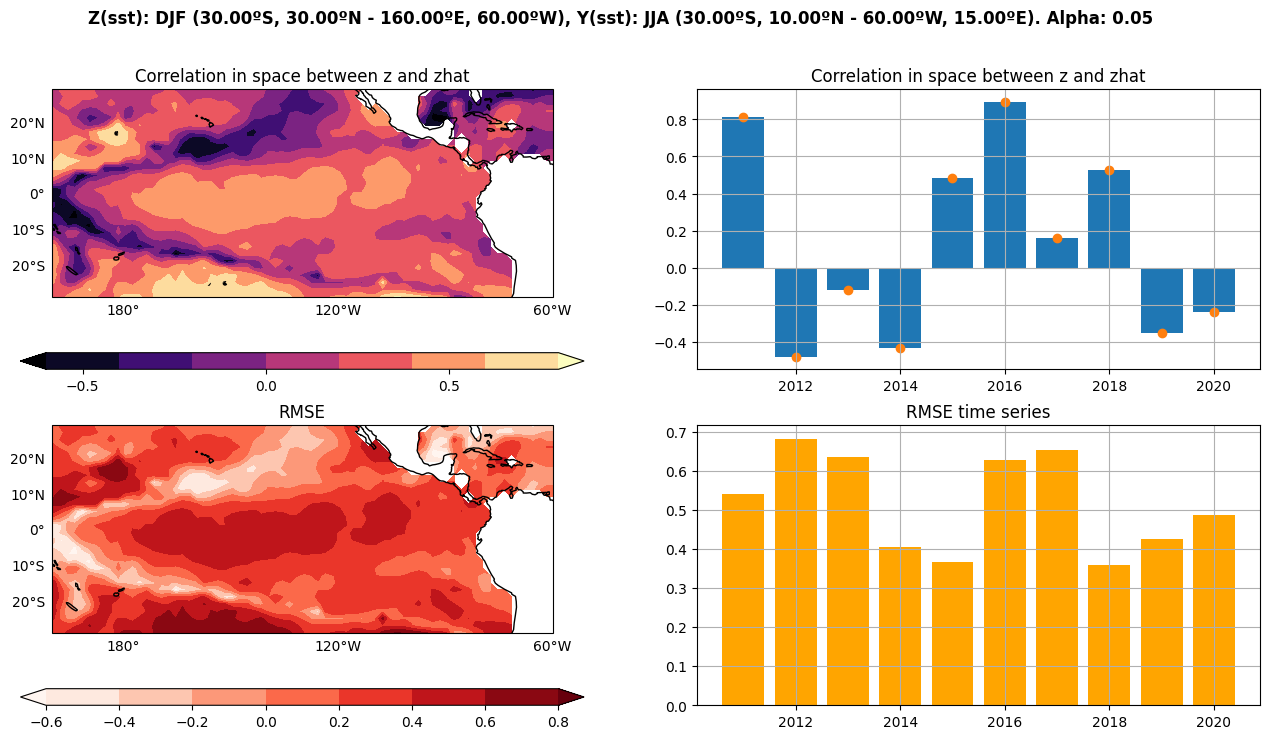

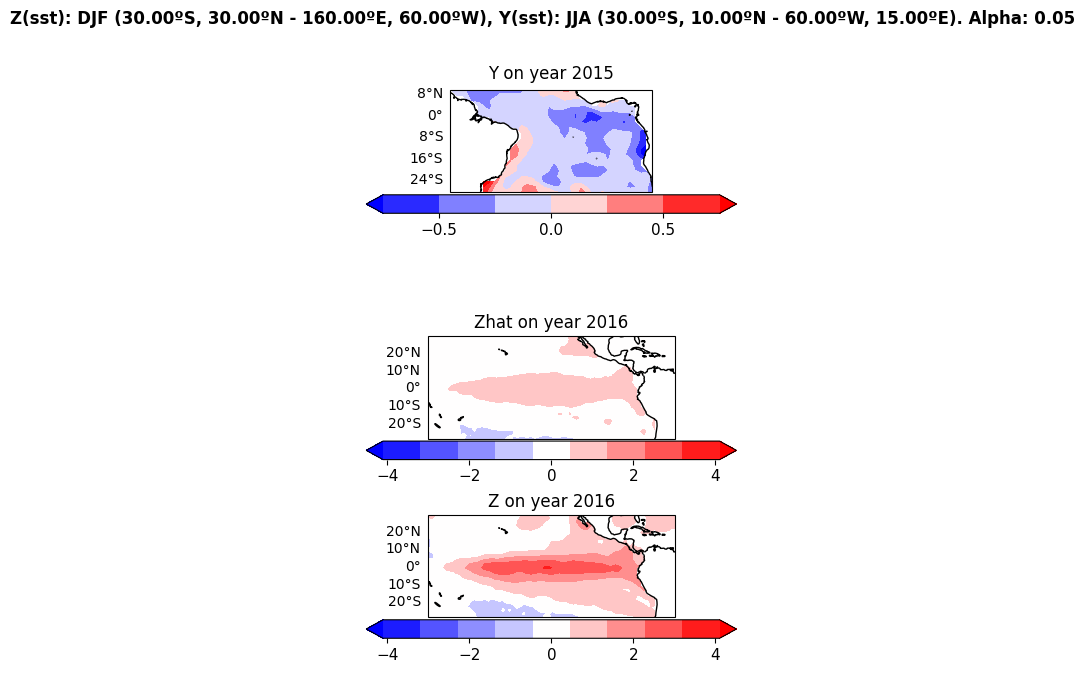

In [12]:
validation = Validation(training_mca, validating_y, validating_z)

validation.save("validation_z_", "./data-EquatorialAtalantic_Impact_Nino/")

validation.plot(save_fig=True, folder="./plots-EquatorialAtalantic_Impact_Nino/", name="validation.png", 
                cmap="magma",
                version='default')
validation.plot_zhat(2016, save_fig=True, folder="./plots-EquatorialAtalantic_Impact_Nino/", 
                     name="zhat_2016_validation.png", z_levels=np.linspace(-4.1, 4.1, 10))